# Week 6: Inferential Statistics

In [1]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Day 1: The Central Limit Theorem & Confidence Intervals
This week we will discuss how conclusions can be drawn (inferences be made) about data using random variables and their probability distributions.

The setting is as follows: let $X \sim \mathcal{N}(\mu, \sigma)$ be a random variable. Assime we choose a random sample of size $n$ based on the distribution of $X$. Next we calculate the sample mean $\bar{x}_1$ where the 1 denotes it is the "first" sample we draw. Now, repeat the process many times, generating a **sequence of averages of samples with size $n$**:
\begin{equation} \bar{x}_1, \bar{x}_2, \dots, \bar{x}_m \end{equation}
Question: what are the mean and the standard deviation of the averages; what shape does this distribution have?

Let us run a simulation to discover

### Example 1
Construct a simulation that generates $m$ samples from the random variable $X \sim \mathcal{N}(100, 12)$, each with size $n$. Then calculate *the mean of the sample means* and the *standard deviation of the sample means* and plot the samples on a histogram. Think about the shape of the distribution.

Mean of means =  100.03450332621225
stdev of means= 3.9765310860542282


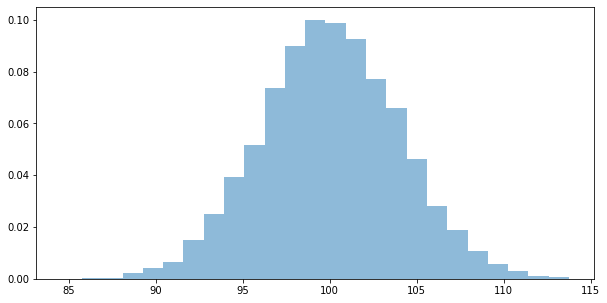

In [ ]:
# Define X
mu = 100
sigma = 12

n=9  #sample size
m=10000 #number of samples we choose 

X= stats.norm(mu,sigma)
means = np.zeros(m)

for i in range(m): #simulation
  sample = X.rvs(size=n)
  means[i] = np.mean(sample)

print('Mean of means = ', np.mean(means))
print('stdev of means=', np.std(means))

plt.figure(figsize=(10,5))
plt.hist(means, density=True, bins= 25, alpha=0.5)
plt.show()

### Example 2
Run a similar simulation like in **Example 1**, but now use a random variable $Q$ which follows a $\chi^2$-distribution with 10 degrees of freedom. Calculate *the mean of the sample means* and the *standard deviation of the sample means* and plot the samples on a histogram. Think about the shape of the distribution.

Mean of means =  9.996450665298477
stdev of means= 0.37951178434397637


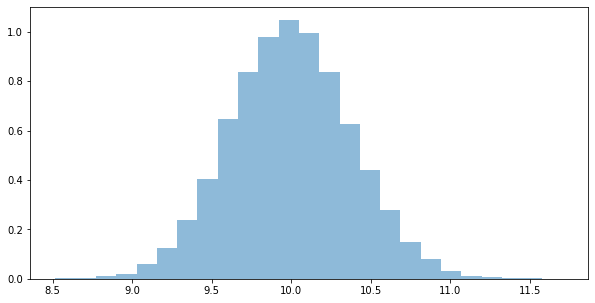

In [ ]:
# Define Q
df = 10


n=140  #sample size
m=10000 #number of samples we choose 

Q= stats.chi2(10)
means = np.zeros(m)

for i in range(m): #simulation
  sample = Q.rvs(size=n)
  means[i] = np.mean(sample)

print('Mean of means = ', np.mean(means))
print('stdev of means=', np.std(means))

plt.figure(figsize=(10,5))
plt.hist(means, density=True, bins= 25, alpha=0.5)
plt.show()

Run the same example from Example 2, but with $X \sim Bernoulli(0.7)$. Historical relevance: The central limit theorem was first explored with this example (by Poisson).


Mean of means =  0.6999225
stdev of means= 0.07289243097709117


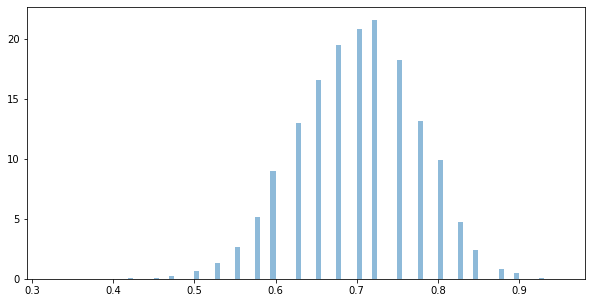

In [ ]:
# Define Q

n= 40
m=10000
Q= stats.bernoulli(0.7)
means = np.zeros(m)

for i in range(m): #simulation
  sample = Q.rvs(size=n)
  means[i] = np.mean(sample)

print('Mean of means = ', np.mean(means))
print('stdev of means=', np.std(means))

plt.figure(figsize=(10,5))
plt.hist(means, density=True, bins= 100, alpha=0.5)
plt.show()

### The Central Limit Theorem
The Central Limit Theorem (CLT) is one of the most (ab)used facts in statistics. Sometimes it is called **the fundamental theorem of statistics** (in analogy to similar theorems in arithmetic, algebra, and calculus)

In simple terms, the CLT states that if you have a random variable $X$ with mean $\mu_X$ and standard deviation $\sigma_X$, and you draw many samples of size $n$ from $X$, then the averages of those samples are described by a random variable, labeled as $\overline{X}=\overline{X_n}$, for which:
* $\mu_\overline{X} = \mu_x$ (the mean of the sample means equals the mean of the original distribution)
* $\sigma_\overline{X} = \displaystyle\frac{\sigma_X}{\sqrt{n}}$ (the standrad deviation of the sample means equals the standard deviation of the original distribution scaled down by a factor of $\sqrt{n}$)

Even more, the shape of the distribution is **approximately** Normal, or in other words $\overline{X} \sim \mathcal{N}\left( \mu_\overline{X}, \sigma_\overline{X}  \right) = \mathcal{N}\left( \mu, \displaystyle\frac{\sigma}{\sqrt{n}} \right)$. This distribution is called the **sampling distribution of the mean**.

If $X$ is distributed normally, then $\overline{X}$ is also distributed normally, and this is the only case when the sampling distribution of the mean is exactly normal.

### Example 3
Illustrate the CLT on the random variable $X \sim \mathcal{N}(160, 10)$ if the sample size is $n = 16$

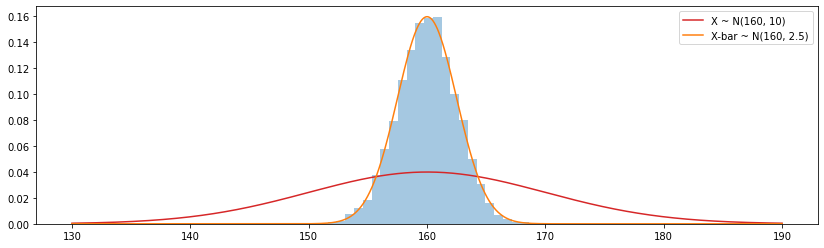

In [ ]:
# Define X
mu = 160
sigma = 10
n = 16
m= 10000 #number of samples

X = stats.norm(mu, sigma)
X_bar = stats.norm(mu, sigma/np.sqrt(n))

means = np.zeros(m)
for i in range(m):
  sample = X.rvs(size=n)
  means[i]= np.mean(sample)

xs = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
plt.figure(figsize=(14, 4))
plt.hist(means, density=True, alpha=0.4, bins=25)
plt.plot(xs, X.pdf(xs), color='tab:red', label=f'X ~ N({mu}, {sigma})')
plt.plot(xs, X_bar.pdf(xs), label=f'X-bar ~ N({mu}, {sigma/np.sqrt(n)})')
plt.legend()
plt.show()


### Example 4
Illustrate the CLT on the random variable $G$ which follows a **geometric distribution** with parameter $p=0.2$, i.e. $G \sim \mathcal{Geom}(0.2)$, with sample size $n = 17$

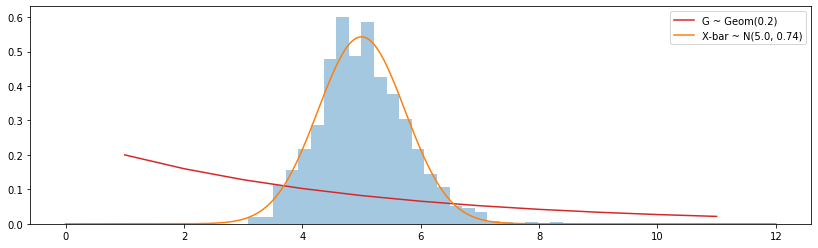

In [3]:
# Define G
p = 0.2
n = 37
m=1000

G=stats.geom(p) 
mean_G = G.mean()
std_G = G.std()
G_bar = stats.norm(mean_G, std_G/np.sqrt(n))

means = np.zeros(m)
for i in range(m):
  sample = G.rvs(size=n)
  means[i] = np.mean(sample)

  
xs_discrete = np.arange(1, 12)
xs = np.linspace(0, 12, 1000)
plt.figure(figsize=(14, 4))
plt.plot(xs_discrete, G.pmf(xs_discrete), color='tab:red', alpha=1, label=f'G ~ Geom({p})')
plt.hist(means, density=True, alpha=0.4, bins=25)
plt.plot(xs, G_bar.pdf(xs), label=f'X-bar ~ N({mean_G}, { np.round(std_G/np.sqrt(n), 2) })')
plt.legend()
plt.show()

### How does this help us with data?
The situation is as following: we have one sample of size $n$ from a population with unknown population mean $\mu$ and population standard deviation $\sigma$. Obviously, the *sample statistics* $\bar{x}$ and $s$ can estimate $\mu$ and $\sigma$, but they can also "miss" them by a lot. These sample statistics are called **point estimates** of the population parameters.

Question: how do we take adventage of the facts stated in the CLT to give an **interval estimate** of the population mean $\mu$?

In practice, if you work with a *large sample* ($n \geqslant 30$ or $40$), then you can consider the sampling distribution to be close enough to the normal distribution. However, in all other cases, the Student *t*-distribution with $n-1$ degrees of freedom describes the sampling distibution much better than the normal distribution.

Recall the **68-95-99.7 Rule** for the Normal distribution. We can constuct something like that for any distribution. Since we only have one sample in reality, we use the sample statistics as estimates of the population parameters. If  $\bar{x}$ and $s$ are the sample mean standard deviation from a sample with size $n$, then the **$(1-\alpha)\%$ confidence interval** estimate of the population mean is given by:
\begin{equation}\displaystyle \bar{x} \pm t_{n-1}^* \cdot \frac{s}{\sqrt{n}}\end{equation}
where $t_{n-1}^*$ is a scaling coefficient that depends on the sample size $n$ and can be obtained using $t$-distribution. The number $df =   n-1$ is the number of **degrees of freedom**, while the quantity $SE = \frac{s}{\sqrt{n}}$ is called **standard error**. Let's see some examples. The number $(1-\alpha)\%$ is called **confidence level** and usually is at least 90%.

### Example 5
In this example, we use a confidence interval to estimate the mean of a known population (i.e. this is just a *controlled* experiment). Let $X \sim \mathcal{N}(100, 12)$. Generate 5 different 90% CIs and 5 more 95% CIs for the mean of the population based on samples of size $n=9$. Comment on what you get.

In [ ]:
# Define X
mu = 100
sigma = 12

X = stats.norm(mu, sigma)
n=9
dfreedom= n-1
T=stats.t(df=dfreedom)

print('90% CI vs 95% CI')
c_level = 0.9


counter = 0 
for i in range(10):
  sample = X.rvs(size = n)
  x_bar = sample.mean()
  se = sample.std()/np.sqrt(n)
  t_star_90 = T.ppf((1+0.90)/2)      
  t_star_95 = T.ppf((1+0.95)/2)
  l_90 = x_bar - t_star_90*se
  u_90 = x_bar + t_star_90*se

  l_95 = x_bar - t_star_95*se
  u_95 = x_bar + t_star_95*se
  print(f'({l_90}, {u_90})')
  print(f'({l_95}, {u_95})')

#print('95% CI')
#c_level = 0.95
#counter = 0 
###for i in range(10):
#  sample = X.rvs(size = n)
##  x_bar = sample.mean()
#  se = sample.std()/np.sqrt(n)
#  t_star = T.ppf((1+c_level)/2)
#  l = x_bar - t_star*se
#  u = x_bar + t_star*se
#  if l<=100 and u>=100:
#        print(f'({l}, {u})')
#        counter
#  else:
#        print(f'({l}, {u}) ***')
#        counter = counter + 1

#print(counter)

90% CI vs 95% CI
(85.61763163243216, 101.77743235576727)
(83.6777404809514, 103.71732350724804)
(94.1170856335611, 107.19658093085685)
(92.54696743548087, 108.76669912893709)
(89.45842347217926, 101.97988521278042)
(87.95529399366276, 103.48301469129692)
(94.13880594769012, 112.68729131711666)
(91.91216694034381, 114.91393032446297)
(91.5534801029778, 109.46454523279868)
(89.40335972997333, 111.61466560580315)
(88.23259984756423, 100.95004914808554)
(86.70594318948665, 102.47670580616312)
(87.54470095917108, 107.28147331825059)
(85.17541493184518, 109.65075934557649)
(94.85499384106618, 104.6914410636409)
(93.67418491552503, 105.87224998918204)
(97.23273494706083, 114.27267028271064)
(95.1871886964998, 116.31821653327167)
(88.34915723802766, 107.61187290806197)
(86.03677899020497, 109.92425115588466)


### Example 6
Let $Y \sim \mathcal{Po}(13)$. Generate 5 different 95% CIs and 5 more 99% CIs for the mean of the population based on samples of size $n=25$. Comment on what you get.

In [6]:
# Define Y
lmbd = 13


Y= stats.poisson(lmbd)

n=25
dfreedom = n-1
T=stats.t(df = dfreedom)


print('95%CI')
c_level=0.95

counter = 0 
for i in range(10):
  sample = Y.rvs(size = n)
  x_bar = sample.mean()
  se = sample.std()/np.sqrt(n)
#  t_star_90 = T.ppf((1+0.90)/2)      
  t_star_95 = T.ppf((1+0.95)/2)
 # l_90 = x_bar - t_star_90*se
 # u_90 = x_bar + t_star_90*se

  l_95 = x_bar - t_star_95*se
  u_95 = x_bar + t_star_95*se
 # print(f'({l_90}, {u_90})')
  print(f'({l_95}, {u_95})')

95%CI
(11.547811165048888, 14.772188834951113)
(12.323475496754739, 15.596524503245263)
(11.497326320023195, 15.142673679976806)
(12.5534326054812, 15.046567394518801)
(12.688564706171272, 15.551435293828726)
(11.539231541175424, 14.700768458824575)
(12.896011733739417, 15.663988266260581)
(10.7590661511806, 14.9209338488194)
(10.365475731158664, 13.634524268841336)
(10.756851637347564, 13.483148362652434)


### Example 7
The sample given in the next cell comes from a distribution whose mean you do not know, but need to estimate. Use a 95% CI to estimate the population mean.

(2.496033806453526, 4.291773841546474)
(2.3005474513778545, 4.487260196622145)


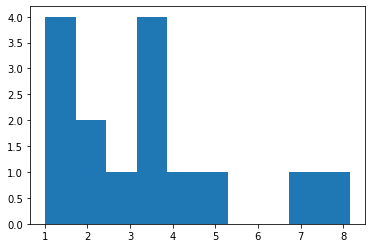

In [7]:
sample = np.array([3.23545161, 3.77542568, 1.01742999, 1.95137322, 3.70661749,
       1.54115566, 3.97507688, 3.74119874, 2.99544951, 1.20815545,
  #     4.43162589, 1.68634582, 0.97010408, 3.81707371, 1.37509011,
       1.46900854, 5.10493947, 8.15556455, 6.73199071, 2.29971986])





n= sample.shape[0]
dfreedom = n-1
T=stats.t(df = dfreedom)
x_bar = sample.mean()
se = sample.std()/np.sqrt(n)
t_star_90 = T.ppf((1+0.90)/2)      
t_star_95 = T.ppf((1+0.95)/2)
l_90 = x_bar - t_star_90*se
u_90 = x_bar + t_star_90*se

l_95 = x_bar - t_star_95*se
u_95 = x_bar + t_star_95*se
print(f'({l_90}, {u_90})')
print(f'({l_95}, {u_95})')

plt.figure()
plt.hist(sample)
plt.show()

#more data:
#(2.428417008087653, 3.890462688912347) ; len = 3.89 - 2.42 = 1.47
#(2.274575262558397, 4.044304434441603) ; len = 4.04 - 2.27

#less data
#(2.496033806453526, 4.291773841546474) ; len = 4.29 - 2.49 = 1.80
#(2.3005474513778545, 4.487260196622145)

In [ ]:
3l